In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_targets

# load train, test, and validation datasets
train_targets = load_dataset('dogImages/train')
valid_targets = load_dataset('dogImages/valid')
test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]


Using TensorFlow backend.


In [5]:
print valid_targets[1]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [7]:
import numpy as np
# train_tensors_original = np.load(open('train_tensors_original.npy'))
test_tensors_original = np.load(open('test_tensors_original.npy'))
valid_tensors_original = np.load(open('valid_tensors_original.npy'))

In [9]:
print test_tensors_original.shape[0]

NameError: name 'test_tensors_original' is not defined

In [2]:
# Transfer Learning. RESNET50
from keras.applications.resnet50 import ResNet50
resnet = ResNet50(include_top=False, weights='imagenet')
print "Done extracting features"

Done extracting features


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from PIL import ImageFilter

# Augmented data
def augment_data(X_train, y_train, num_additional_data):     
    train_datagen = ImageDataGenerator(
        
    rotation_range = 25,
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True, # randomly flip images horizontally
    shear_range = 0.15, # rnadomly applying shear transformation
    zoom_range = 0.2) # randomly zooming inside pictures

    train_datagen.fit(X_train)
    
    aug_x, aug_y = train_datagen.flow(X_train, y_train, batch_size=num_additional_data).next()
    return aug_x, aug_y

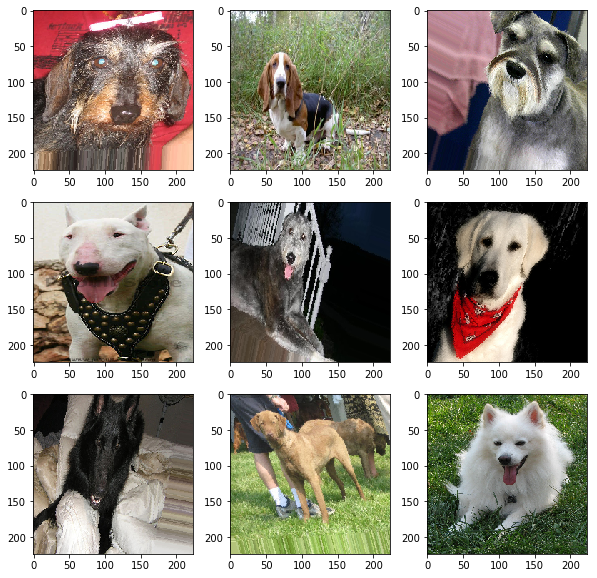

In [5]:
import PIL
from matplotlib import pyplot as plt
plt.ion()

plt.subplots(figsize = (10,10))
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(PIL.Image.fromarray(np.uint8(x_train_aug1[np.random.randint(0,x_train_aug1.shape[0])])))

In [ ]:
x_aug2, y_aug2 = augment_data(train_tensors_original, train_targets, train_tensors_original.shape[0])

In [ ]:
x_train_aug3x = np.vstack((x_train_aug1, x_aug2))
print(x_train_aug3x.shape)

In [ ]:
y_train_aug3x = np.vstack((y_train_aug1, y_aug2))
print(y_train_aug3x.shape)

In [3]:
import numpy as np
x_train_aug = np.load(open('x_train_aug.npy'))
print(x_train_aug.shape)

(20040, 224, 224, 3)


In [2]:
import numpy as np
y_train_aug = np.load(open('y_train_aug.npy'))
print(y_train_aug.shape)

(20040, 133)


In [5]:
print(x_train_aug.shape)

(20040, 224, 224, 3)


In [1]:
import numpy as np
x_train_aug1 = np.load(open('x_aug1.npy'))

In [14]:
y_train_aug1 = np.load(open('y_aug1.npy'))
print(y_train_aug1.shape)

(13360, 133)


In [4]:
from keras.applications.resnet50 import preprocess_input
train_tensors_resnet = preprocess_input(x_train_aug)

In [11]:
valid_tensors_resnet = preprocess_input(valid_tensors_original)
test_tensors_resnet = preprocess_input(test_tensors_original)

In [6]:
train_resnet_features = resnet.predict(train_tensors_resnet)
print(train_resnet_features.shape)

(20040, 1, 1, 2048)


In [12]:
valid_resnet_features = resnet.predict(valid_tensors_resnet)
print(valid_resnet_features.shape)

(835, 1, 1, 2048)


In [13]:
test_resnet_features = resnet.predict(test_tensors_resnet)
print(test_resnet_features.shape)

(836, 1, 1, 2048)


In [14]:
np.save(open('bottleneck_features//valid_resnet_features_aug.npy', 'w'), valid_resnet_features)
np.save(open('bottleneck_features//test_resnet_features_aug.npy', 'w'), test_resnet_features)

In [8]:
np.save(open('bottleneck_features//train_resnet_features_aug.npy', 'w'), train_resnet_features)


In [ ]:
# Alternatively just use saved pretrained features
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_resnet_features = bottleneck_features['train']
valid_resnet_features = bottleneck_features['valid']
test_resnet_features = bottleneck_features['test']

In [ ]:
print(train_resnet_features.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization


ResNet_model = Sequential()
ResNet_model.add(GlobalAveragePooling2D(input_shape=train_resnet_features.shape[1:]))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Dropout(0.5))

ResNet_model.add(Dense(2 * 133,activation='relu'))
ResNet_model.add(BatchNormalization())
ResNet_model.add(Dropout(0.5))

ResNet_model.add(Dense(133, activation='softmax'))

ResNet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ResNet_model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.resnet.hdf5', 
                               verbose=1, save_best_only=True)


history_resnet = ResNet_model.fit(train_resnet_features, y_train_aug, 
          batch_size = 128,
          epochs=30,
          verbose=1,
          validation_data=(valid_resnet_features, valid_targets),
          callbacks=[checkpointer, EarlyStopping(min_delta=1e-7, patience=10)
          ])

In [ ]:
### Load the model weights with the best validation loss.
ResNet_model.load_weights('saved_models/weights.best.resnet.hdf5')

In [ ]:
# get index of predicted dog breed for each image in test set
ResNet50_predictions = [np.argmax(ResNet_model.predict(np.expand_dims(feature, axis=0))) for feature in test_resnet_features]

# report test accuracy
test_accuracy = 100.0*np.sum(np.array(ResNet50_predictions)==np.argmax(test_targets, axis=1))/len(ResNet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

In [ ]:
import PIL
from matplotlib import pyplot as plt
plt.ion()

plt.subplots(figsize = (10,10))
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(PIL.Image.fromarray(np.uint8(x_train_aug[13000])))

In [ ]:
# INCEPTION

In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
input_tensor = Input(shape = (224,224,3))
inception = InceptionV3(input_tensor = input_tensor, include_top=False, weights='imagenet')
print "Done extracting weights"

Done extracting weights


In [12]:
from keras.applications.inception_v3 import preprocess_input
train_tensors_inception = preprocess_input(x_train_aug)
# train_tensors_inception = preprocess_input(x_train_aug)


In [15]:
valid_tensors_inception = preprocess_input(valid_tensors_original)
test_tensors_inception = preprocess_input(test_tensors_original)

In [16]:
train_inception_features2 = inception.predict(train_tensors_inception)
print(train_inception_features2.shape)

(20040, 5, 5, 2048)


In [17]:
valid_inception_features = inception.predict(valid_tensors_inception)
print(valid_inception_features.shape)

(835, 5, 5, 2048)


In [18]:
test_inception_features = inception.predict(test_tensors_inception)
print(test_inception_features.shape)

(836, 5, 5, 2048)


In [20]:
np.save(open('bottleneck_features//train_inception_features.npy', 'w'), train_inception_features2)
np.save(open('bottleneck_features//valid_inception_features.npy', 'w'), valid_inception_features)
np.save(open('bottleneck_features//test_inception_features.npy', 'w'), test_inception_features)

In [ ]:
# Alternatively just use saved pretrained features
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_inception_features = bottleneck_features['train']
valid_inception_features = bottleneck_features['valid']
test_inception_features = bottleneck_features['test']

In [24]:
print(train_inception_features2.shape)

(20040, 5, 5, 2048)


In [30]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization


Inception_model = Sequential()

Inception_model.add(GlobalAveragePooling2D(input_shape=train_inception_features2.shape[1:]))
Inception_model.add(BatchNormalization())
Inception_model.add(Dropout(0.5))
Inception_model.add(Dense(2 * 133,activation='relu'))
Inception_model.add(BatchNormalization())
Inception_model.add(Dropout(0.5))

Inception_model.add(Dense(133, activation='softmax'))
Inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Inception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 266)               545034    
_________________________________________________________________
batch_normalization_100 (Bat (None, 266)               1064      
_________________________________________________________________
dropout_6 (Dropout)          (None, 266)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               35511     
Total para

In [31]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.inception_augmented.hdf5', 
                               verbose=1, save_best_only=True)


history_inception = Inception_model.fit(train_inception_features2, y_train_aug, 
          batch_size = 8,
          epochs=30,
          verbose=1,
          validation_data=(valid_inception_features, valid_targets),
          callbacks=[checkpointer, EarlyStopping(min_delta=1e-7, patience=10)
          ])

Train on 20040 samples, validate on 835 samples
Epoch 1/30
20040/20040 [==============================] - 21s 1ms/step - loss: 1.5124 - acc: 0.6151 - val_loss: 0.5707 - val_acc: 0.8240
Epoch 2/30
20040/20040 [==============================] - 20s 980us/step - loss: 0.9492 - acc: 0.7304 - val_loss: 0.5607 - val_acc: 0.8299
Epoch 3/30
20040/20040 [==============================] - 20s 978us/step - loss: 0.8247 - acc: 0.7584 - val_loss: 0.5347 - val_acc: 0.8491
Epoch 4/30
20040/20040 [==============================] - 20s 976us/step - loss: 0.7506 - acc: 0.7774 - val_loss: 0.5030 - val_acc: 0.8491
Epoch 5/30
20040/20040 [==============================] - 19s 960us/step - loss: 0.7071 - acc: 0.7874 - val_loss: 0.5421 - val_acc: 0.8407
Epoch 6/30
20040/20040 [==============================] - 19s 962us/step - loss: 0.6589 - acc: 0.8024 - val_loss: 0.5386 - val_acc: 0.8575
Epoch 7/30
20040/20040 [==============================] - 19s 959us/step - loss: 0.6293 - acc: 0.8028 - val_loss: 0.5662

In [48]:
print history_inception.history['acc']

[0.61511976047904193, 0.73043912175648706, 0.75843313373253496, 0.77744510978043913, 0.78742514970059885, 0.80239520958083832, 0.80284431137724555, 0.81177644710578845, 0.81801397205588822, 0.82749500998003989, 0.83003992015968064, 0.83727544910179641, 0.84001996007984037, 0.84316367265469061, 0.83852295409181632, 0.85154690618762474, 0.85054890219560875, 0.85603792415169666, 0.85573852295409181]


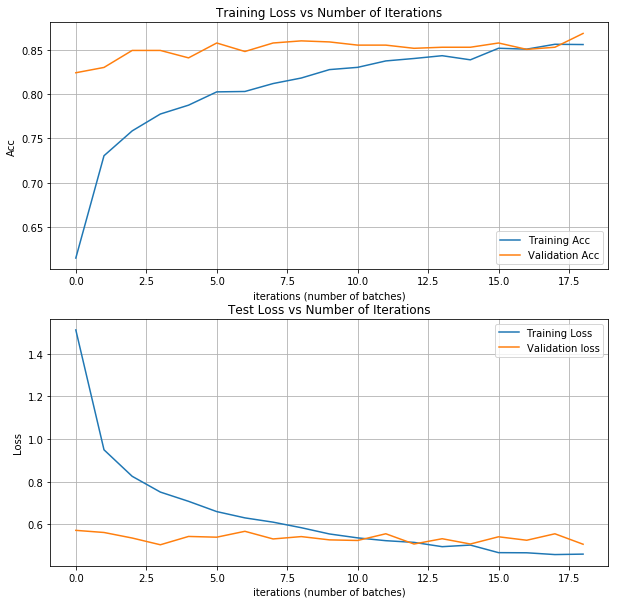

In [50]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
plt.subplot(2, 1, 1)

plt.plot(history_inception.history['acc'], label = "Training Acc")
plt.plot(history_inception.history['val_acc'], label = "Validation Acc")

plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Acc")
plt.title("Training Loss vs Number of Iterations")
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(history_inception.history['loss'], label = "Training Loss")
plt.plot(history_inception.history['val_loss'], label = "Validation loss")
plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Loss")
plt.title("Test Loss vs Number of Iterations")
plt.grid()
plt.show()

In [46]:
### Load the model weights with the best validation loss.
Inception_model.load_weights('saved_models/weights.best.inception_augmented.hdf5')

NameError: name 'Inception_model' is not defined

In [35]:
Inception_predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_inception_features]

# report test accuracy
test_accuracy = 100.0*np.sum(np.array(Inception_predictions)==np.argmax(test_targets, axis=1))/len(Inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.0000%


In [ ]:
# xception

In [4]:
from keras.applications.xception import Xception
from keras.layers import Input
input_tensor = Input(shape = (224,224,3))
xception = Xception(input_tensor = input_tensor, include_top=False, weights='imagenet')
print "Done extracting weights"

Done extracting weights


In [2]:
from keras.applications.xception import preprocess_input
train_tensors_xception = preprocess_input(x_train_aug1)
# train_tensors_xception = preprocess_input(x_train_aug)


Using TensorFlow backend.


In [8]:
valid_tensors_xception = preprocess_input(valid_tensors_original)
test_tensors_xception = preprocess_input(test_tensors_original)

In [5]:
train_xception_features2 = xception.predict(train_tensors_xception)
print(train_xception_features2.shape)

(13360, 7, 7, 2048)


In [ ]:
valid_xception_features = xception.predict(valid_tensors_xception)
print(valid_xception_features.shape)

(835, 7, 7, 2048)


In [ ]:
test_xception_features = xception.predict(test_tensors_xception)
print(test_xception_features.shape)

In [ ]:
np.save(open('bottleneck_features//valid_xception_features_aug.npy', 'w'), valid_xception_features)
np.save(open('bottleneck_features//test_xception_features_aug.npy', 'w'), test_xception_features)

In [6]:
np.save(open('bottleneck_features//train_xception_features_aug.npy', 'w'), train_xception_features2)

In [30]:
print(train_xception_features2.shape)

(13360, 7, 7, 2048)


In [31]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization


xception_model = Sequential()

xception_model.add(GlobalAveragePooling2D(input_shape=train_xception_features2.shape[1:]))
xception_model.add(BatchNormalization())
xception_model.add(Dropout(0.5))
xception_model.add(Dense(2 * 133,activation='relu'))
xception_model.add(BatchNormalization())
xception_model.add(Dropout(0.5))

xception_model.add(Dense(133, activation='softmax'))
xception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

xception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 266)               545034    
_________________________________________________________________
batch_normalization_6 (Batch (None, 266)               1064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 266)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               35511     
Total para

In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.xception_augmented_2.hdf5', 
                               verbose=1, save_best_only=True)


history_xception = xception_model.fit(train_xception_features2, y_train_aug1,
          batch_size = 8,
          epochs=20,
          verbose=1,
          validation_data=(valid_xception_features, valid_targets),
          callbacks=[checkpointer, EarlyStopping(min_delta=1e-7, patience=15)
          ])

Train on 13360 samples, validate on 835 samples
Epoch 1/20
13360/13360 [==============================] - 14s 1ms/step - loss: 0.5052 - acc: 0.8388 - val_loss: 0.4991 - val_acc: 0.8515
Epoch 2/20
13360/13360 [==============================] - 14s 1ms/step - loss: 0.5062 - acc: 0.8388 - val_loss: 0.4985 - val_acc: 0.8563
Epoch 3/20
13360/13360 [==============================] - 14s 1ms/step - loss: 0.4779 - acc: 0.8456 - val_loss: 0.4900 - val_acc: 0.8623
Epoch 4/20
13360/13360 [==============================] - 15s 1ms/step - loss: 0.4710 - acc: 0.8526 - val_loss: 0.4754 - val_acc: 0.8527
Epoch 5/20
13360/13360 [==============================] - 15s 1ms/step - loss: 0.4557 - acc: 0.8561 - val_loss: 0.4717 - val_acc: 0.8479
Epoch 6/20
13360/13360 [==============================] - 15s 1ms/step - loss: 0.4492 - acc: 0.8541 - val_loss: 0.4718 - val_acc: 0.8563
Epoch 7/20
13360/13360 [==============================] - 15s 1ms/step - loss: 0.4524 - acc: 0.8562 - val_loss: 0.5150 - val_acc: 

In [42]:
### Load the model weights with the best validation loss.
xception_model.load_weights('saved_models/weights.best.xception_augmented_2.hdf5')

In [43]:
xception_predictions = [np.argmax(xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_xception_features]

# report test accuracy
test_accuracy = 100.0*np.sum(np.array(xception_predictions)==np.argmax(test_targets, axis=1))/len(xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 85.4067%


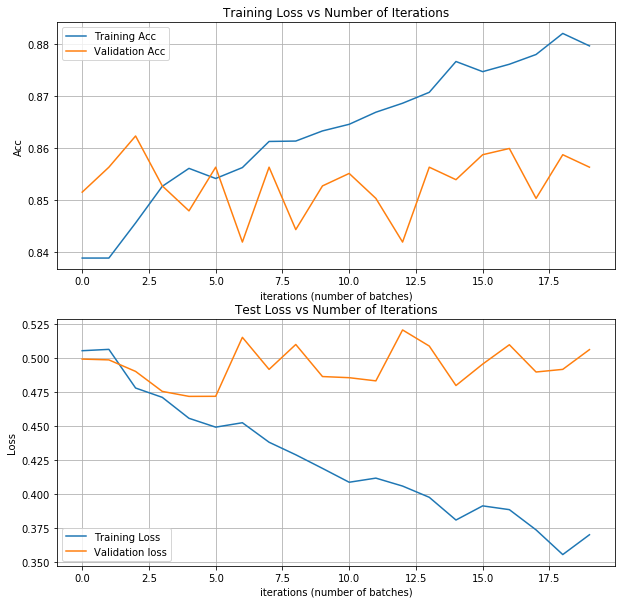

In [44]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
plt.subplot(2, 1, 1)

plt.plot(history_xception.history['acc'], label = "Training Acc")
plt.plot(history_xception.history['val_acc'], label = "Validation Acc")

plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Acc")
plt.title("Training Loss vs Number of Iterations")
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(history_xception.history['loss'], label = "Training Loss")
plt.plot(history_xception.history['val_loss'], label = "Validation loss")
plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Loss")
plt.title("Test Loss vs Number of Iterations")
plt.grid()
plt.show()

In [ ]:
# vgg16

In [3]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False, weights='imagenet')
print "Done extracting weights"

Using TensorFlow backend.


Done extracting weights


In [4]:
from keras.applications.vgg16 import preprocess_input

train_tensors_vgg16 = preprocess_input(x_train_aug1)
valid_tensors_vgg16 = preprocess_input(valid_tensors_original)
test_tensors_vgg16 = preprocess_input(test_tensors_original)

In [12]:
print (train_tensors_vgg16.shape[0])

13360


In [13]:
train_vgg16_features = vgg16.predict(train_tensors_vgg16[0:10])
for i in np.arange(10, train_tensors_vgg16.shape[0], 10):
    print i
    y_predict0 = vgg16.predict(train_tensors_vgg16[i:i+10])
    train_vgg16_features = np.concatenate((train_vgg16_features, y_predict0), axis = 0)
print(train_vgg16_features.shape)

(13360, 7, 7, 512)


In [10]:
valid_vgg16_features = vgg16.predict(valid_tensors_vgg16[0:5])
for i in np.arange(5, valid_tensors_vgg16.shape[0], 10):
    y_predict0 = vgg16.predict(valid_tensors_vgg16[i:i+10])
    valid_vgg16_features = np.concatenate((valid_vgg16_features, y_predict0), axis = 0)
print(valid_vgg16_features.shape)


(835, 7, 7, 512)


In [11]:
test_vgg16_features = vgg16.predict(test_tensors_vgg16[0:6])
for i in np.arange(6, test_tensors_vgg16.shape[0], 10):
    y_predict0 = vgg16.predict(test_tensors_vgg16[i:i+10])
    test_vgg16_features = np.concatenate((test_vgg16_features, y_predict0), axis = 0)
print(test_vgg16_features.shape)

(836, 7, 7, 512)


In [14]:
np.save(open('bottleneck_features//train_vgg16_features_aug.npy', 'w'), train_vgg16_features)
np.save(open('bottleneck_features//valid_vgg16_features_aug.npy', 'w'), valid_vgg16_features)
np.save(open('bottleneck_features//test_vgg16_features_aug.npy', 'w'), test_vgg16_features)

In [ ]:
# Alternatively just use saved pretrained features
bottleneck_features = np.load('bottleneck_features/Dogvgg16V3Data.npz')
train_vgg16_features = bottleneck_features['train']
valid_vgg16_features = bottleneck_features['valid']
test_vgg16_features = bottleneck_features['test']

In [ ]:
print(train_vgg16_features.shape)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization


vgg16_model = Sequential()

vgg16_model.add(GlobalAveragePooling2D(input_shape=train_vgg16_features.shape[1:]))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(2 * 133,activation='relu'))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))

vgg16_model.add(Dense(133, activation='softmax'))
vgg16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 266)               136458    
_________________________________________________________________
batch_normalization_2 (Batch (None, 266)               1064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 266)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               35511     
Total para

In [20]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.vgg16_augmented.hdf5', 
                               verbose=1, save_best_only=True)


history_vgg16 = vgg16_model.fit(train_vgg16_features, y_train_aug1, 
          batch_size = 8,
          epochs=30,
          verbose=1,
          validation_data=(valid_vgg16_features, valid_targets),
          callbacks=[checkpointer, EarlyStopping(min_delta=1e-7, patience=15)
          ])

Train on 13360 samples, validate on 835 samples
Epoch 1/30
13360/13360 [==============================] - 12s 908us/step - loss: 3.3281 - acc: 0.2365 - val_loss: 1.2092 - val_acc: 0.6611
Epoch 2/30
13360/13360 [==============================] - 10s 761us/step - loss: 1.9859 - acc: 0.4484 - val_loss: 0.9250 - val_acc: 0.7269
Epoch 3/30
13360/13360 [==============================] - 10s 757us/step - loss: 1.7731 - acc: 0.5043 - val_loss: 0.8114 - val_acc: 0.7545
Epoch 4/30
13360/13360 [==============================] - 10s 771us/step - loss: 1.6576 - acc: 0.5251 - val_loss: 0.8083 - val_acc: 0.7497
Epoch 5/30
13360/13360 [==============================] - 10s 760us/step - loss: 1.5985 - acc: 0.5448 - val_loss: 0.7599 - val_acc: 0.7605
Epoch 6/30
13360/13360 [==============================] - 10s 762us/step - loss: 1.5352 - acc: 0.5615 - val_loss: 0.7237 - val_acc: 0.7725
Epoch 7/30
13360/13360 [==============================] - 10s 768us/step - loss: 1.4997 - acc: 0.5684 - val_loss: 0.72

In [21]:
### Load the model weights with the best validation loss.
vgg16_model.load_weights('saved_models/weights.best.vgg16_augmented.hdf5')

In [23]:
vgg16_predictions = [np.argmax(vgg16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_vgg16_features]

# report test accuracy
test_accuracy = 100.0*np.sum(np.array(vgg16_predictions)==np.argmax(test_targets, axis=1))/len(vgg16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.9043%


In [ ]:
# vgg19

In [3]:
from keras.applications.vgg19 import VGG19
vgg19 = VGG19(include_top=False, weights='imagenet')
print "Done extracting weights"

Using TensorFlow backend.


Done extracting weights


In [4]:
from keras.applications.vgg19 import preprocess_input

train_tensors_vgg19 = preprocess_input(x_train_aug1)
valid_tensors_vgg19 = preprocess_input(valid_tensors_original)
test_tensors_vgg19 = preprocess_input(test_tensors_original)

In [5]:
print (train_tensors_vgg19.shape[0])

13360


In [6]:
train_vgg19_features = vgg19.predict(train_tensors_vgg19[0:10])
for i in np.arange(10, train_tensors_vgg19.shape[0], 10):
    print i
    y_predict0 = vgg19.predict(train_tensors_vgg19[i:i+10])
    train_vgg19_features = np.concatenate((train_vgg19_features, y_predict0), axis = 0)
print(train_vgg19_features.shape)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [7]:
valid_vgg19_features = vgg19.predict(valid_tensors_vgg19[0:5])
for i in np.arange(5, valid_tensors_vgg19.shape[0], 10):
    y_predict0 = vgg19.predict(valid_tensors_vgg19[i:i+10])
    valid_vgg19_features = np.concatenate((valid_vgg19_features, y_predict0), axis = 0)
print(valid_vgg19_features.shape)


(835, 7, 7, 512)


In [8]:
test_vgg19_features = vgg19.predict(test_tensors_vgg19[0:6])
for i in np.arange(6, test_tensors_vgg19.shape[0], 10):
    y_predict0 = vgg19.predict(test_tensors_vgg19[i:i+10])
    test_vgg19_features = np.concatenate((test_vgg19_features, y_predict0), axis = 0)
print(test_vgg19_features.shape)

(836, 7, 7, 512)


In [9]:
np.save(open('bottleneck_features//train_vgg19_features_aug.npy', 'w'), train_vgg19_features)
np.save(open('bottleneck_features//valid_vgg19_features_aug.npy', 'w'), valid_vgg19_features)
np.save(open('bottleneck_features//test_vgg19_features_aug.npy', 'w'), test_vgg19_features)

In [ ]:
# Alternatively just use saved pretrained features
bottleneck_features = np.load('bottleneck_features/Dogvgg19V3Data.npz')
train_vgg19_features = bottleneck_features['train']
valid_vgg19_features = bottleneck_features['valid']
test_vgg19_features = bottleneck_features['test']

In [11]:
print(train_vgg19_features.shape)

(13360, 7, 7, 512)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization


vgg19_model = Sequential()

vgg19_model.add(GlobalAveragePooling2D(input_shape=train_vgg19_features.shape[1:]))
vgg19_model.add(BatchNormalization())
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(2 * 133,activation='relu'))
vgg19_model.add(BatchNormalization())
vgg19_model.add(Dropout(0.5))

vgg19_model.add(Dense(133, activation='softmax'))
vgg19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 266)               136458    
_________________________________________________________________
batch_normalization_2 (Batch (None, 266)               1064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 266)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               35511     
Total para

In [15]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.vgg19_augmented.hdf5', 
                               verbose=1, save_best_only=True)


history_vgg19 = vgg19_model.fit(train_vgg19_features, y_train_aug1, 
          batch_size = 16,
          epochs=30,
          verbose=1,
          validation_data=(valid_vgg19_features, valid_targets),
          callbacks=[checkpointer, EarlyStopping(min_delta=1e-7, patience=15)
          ])

Train on 13360 samples, validate on 835 samples
Epoch 1/30
13360/13360 [==============================] - 7s 504us/step - loss: 3.2641 - acc: 0.2540 - val_loss: 1.1975 - val_acc: 0.6862
Epoch 2/30
13360/13360 [==============================] - 5s 405us/step - loss: 1.7546 - acc: 0.5082 - val_loss: 0.8676 - val_acc: 0.7377
Epoch 3/30
13360/13360 [==============================] - 6s 412us/step - loss: 1.4354 - acc: 0.5797 - val_loss: 0.7713 - val_acc: 0.7617
Epoch 4/30
13360/13360 [==============================] - 5s 409us/step - loss: 1.3160 - acc: 0.6115 - val_loss: 0.7164 - val_acc: 0.7749
Epoch 5/30
13360/13360 [==============================] - 6s 413us/step - loss: 1.2681 - acc: 0.6253 - val_loss: 0.7124 - val_acc: 0.7772
Epoch 6/30
13360/13360 [==============================] - 6s 417us/step - loss: 1.2226 - acc: 0.6315 - val_loss: 0.6967 - val_acc: 0.7772
Epoch 7/30
13360/13360 [==============================] - 6s 415us/step - loss: 1.1715 - acc: 0.6488 - val_loss: 0.6716 - va

Epoch 29/30
13360/13360 [==============================] - 5s 407us/step - loss: 0.9205 - acc: 0.7175 - val_loss: 0.6355 - val_acc: 0.8048
Epoch 30/30
13360/13360 [==============================] - 5s 404us/step - loss: 0.9158 - acc: 0.7150 - val_loss: 0.6261 - val_acc: 0.8000


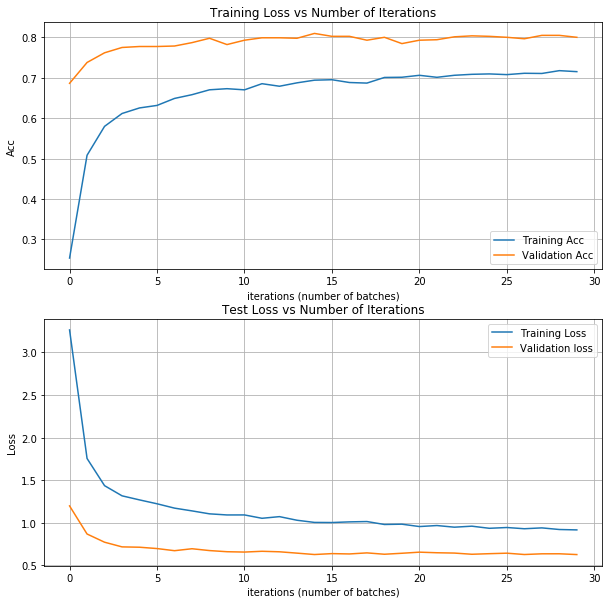

In [18]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
plt.subplot(2, 1, 1)

plt.plot(history_vgg19.history['acc'], label = "Training Acc")
plt.plot(history_vgg19.history['val_acc'], label = "Validation Acc")

plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Acc")
plt.title("Training Loss vs Number of Iterations")
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(history_vgg19.history['loss'], label = "Training Loss")
plt.plot(history_vgg19.history['val_loss'], label = "Validation loss")
plt.legend()
plt.xlabel("iterations (number of batches)")
plt.ylabel("Loss")
plt.title("Test Loss vs Number of Iterations")
plt.grid()
plt.show()

In [19]:
### Load the model weights with the best validation loss.
vgg19_model.load_weights('saved_models/weights.best.vgg19_augmented.hdf5')

In [21]:
vgg19_predictions = [np.argmax(vgg19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_vgg19_features]

# report test accuracy
test_accuracy = 100.0*np.sum(np.array(vgg19_predictions)==np.argmax(test_targets, axis=1))/len(vgg19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.5455%


In [ ]:
# ENSEMBLE

In [ ]:
print np.where(np.array(Xception_predictions)!=np.argmax(test_targets, axis=1))

In [ ]:
print np.where(np.array(Inception_predictions)!=np.argmax(test_targets, axis=1))

In [ ]:
print np.where(np.array(ResNet50_predictions)!=np.argmax(test_targets, axis=1))

In [ ]:
print np.where(np.array(vgg19_predictions)!=np.argmax(test_targets, axis=1))

In [ ]:
print np.where(np.array(vgg16_predictions)!=np.argmax(test_targets, axis=1))

In [ ]:
vgg16_predict_weights = vgg16_model.predict(valid_vgg16_features)
vgg19_predict_weights = vgg19_model.predict(valid_vgg19_features)
resnet_predict_weights = ResNet_model.predict(valid_resnet_features)
inception_predict_weights = Inception_model.predict(valid_inception_features)
xception_predict_weights = Xception_model.predict(valid_xception_features)

In [ ]:
vgg16_valid_accuracy = 1.0*np.sum(np.argmax(vgg16_predict_weights, axis = 1)==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
vgg19_valid_accuracy = 1.0*np.sum(np.argmax(vgg19_predict_weights, axis = 1)==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
resnet_valid_accuracy = 1.0*np.sum(np.argmax(resnet_predict_weights, axis = 1)==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
inception_valid_accuracy = 1.0*np.sum(np.argmax(inception_predict_weights, axis = 1)==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
xception_valid_accuracy = 1.0*np.sum(np.argmax(xception_predict_weights, axis = 1)==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)

In [ ]:
print vgg19_valid_accuracy

In [ ]:
ensemble_weights =  np.add(vgg16_valid_accuracy*vgg16_predict_weights, vgg19_valid_accuracy*vgg19_predict_weights)
ensemble_weights = np.add(ensemble_weights, resnet_valid_accuracy*resnet_predict_weights)
ensemble_weights = np.add(ensemble_weights, inception_valid_accuracy*inception_predict_weights)
ensemble_weights = np.add(ensemble_weights, xception_valid_accuracy*xception_predict_weights)
print ensemble_weights.shape

In [ ]:
ensemble_predictions = np.argmax(ensemble_weights, axis = 1)

In [ ]:
print np.where(ensemble_predictions!=np.argmax(valid_targets, axis=1))

In [ ]:
valid_accuracy = 100*np.sum(ensemble_predictions==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
print('Test accuracy: %.4f%%' % valid_accuracy)

In [ ]:
vgg16_pr = np_utils.to_categorical( np.argmax(vgg16_predict_weights, axis = 1), 133)
vgg19_pr = np_utils.to_categorical( np.argmax(vgg19_predict_weights, axis = 1), 133)
resnet_pr = np_utils.to_categorical( np.argmax(resnet_predict_weights, axis = 1), 133)
inception_pr = np_utils.to_categorical( np.argmax(inception_predict_weights, axis = 1), 133)
xception_pr = np_utils.to_categorical( np.argmax(xception_predict_weights, axis = 1), 133)


In [ ]:
ensemble_pr =  np.add(vgg16_valid_accuracy*vgg16_pr, vgg19_valid_accuracy*vgg19_pr)
ensemble_pr = np.add(ensemble_pr, resnet_valid_accuracy*resnet_pr)
ensemble_pr = np.add(ensemble_pr, inception_valid_accuracy*inception_pr)
ensemble_pr = np.add(ensemble_pr, xception_valid_accuracy*xception_pr)
print ensemble_pr.shape

In [ ]:
valid_accuracy = 100.0*np.sum(ensemble_majority==np.argmax(valid_targets, axis=1))/len(ensemble_predictions)
print('Test accuracy: %.4f%%' % valid_accuracy)